# Some necessary library imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

## Some data preprocessing steps

In [176]:
data = pd.read_csv('sbi_l.csv')
data.drop(['Unnamed: 0'],axis = 1, inplace = True)
y = pd.DataFrame(data['CloseNext'])
X = data.drop(['CloseNext'], axis = 1)

In [177]:
X = np.array(X)
y = np.array(y)
#X = X[1700:2030,:]
#y = y[1700:2030,:]
y = y.flatten()

Feature scaling

In [178]:
scaled = StandardScaler()
scaled.fit(X)
X = scaled.transform(X)

Train Test split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## ANN implementation

In [180]:
# define base model of our neural network for regression taks
def endgame():
    # Adding the neurons in various layers
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model for our use in KerasRegressor
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mape'])
    return model

In [181]:
ann_regression = KerasRegressor(build_fn = endgame, epochs=100, batch_size=5, verbose=1)

In [182]:
ann_regression.fit(X_train,y_train)

Epoch 1/100
1421/1421 [==============================] - 2s 1ms/step - loss: 58382.0533 - mean_absolute_percentage_error: 98.5079
Epoch 2/100
1421/1421 [==============================] - 0s 315us/step - loss: 27282.7907 - mean_absolute_percentage_error: 61.5315
Epoch 3/100
1421/1421 [==============================] - 0s 316us/step - loss: 8491.8209 - mean_absolute_percentage_error: 34.2685
Epoch 4/100
1421/1421 [==============================] - 1s 421us/step - loss: 6290.1349 - mean_absolute_percentage_error: 29.4525
Epoch 5/100
1421/1421 [==============================] - 0s 315us/step - loss: 4055.4712 - mean_absolute_percentage_error: 23.5046
Epoch 6/100
1421/1421 [==============================] - 0s 317us/step - loss: 2167.9597 - mean_absolute_percentage_error: 16.7640
Epoch 7/100
1421/1421 [==============================] - 0s 317us/step - loss: 1078.2242 - mean_absolute_percentage_error: 11.8525
Epoch 8/100
1421/1421 [==============================] - 0s 311us/step - loss: 542.

1421/1421 [==============================] - 0s 288us/step - loss: 28.3859 - mean_absolute_percentage_error: 1.6153
Epoch 65/100
1421/1421 [==============================] - 0s 289us/step - loss: 28.6457 - mean_absolute_percentage_error: 1.6460
Epoch 66/100
1421/1421 [==============================] - 0s 293us/step - loss: 28.7103 - mean_absolute_percentage_error: 1.6261
Epoch 67/100
1421/1421 [==============================] - 0s 288us/step - loss: 29.8363 - mean_absolute_percentage_error: 1.6551
Epoch 68/100
1421/1421 [==============================] - 0s 287us/step - loss: 28.3277 - mean_absolute_percentage_error: 1.6022
Epoch 69/100
1421/1421 [==============================] - 0s 287us/step - loss: 28.7835 - mean_absolute_percentage_error: 1.6372
Epoch 70/100
1421/1421 [==============================] - 0s 295us/step - loss: 28.2378 - mean_absolute_percentage_error: 1.6193
Epoch 71/100
1421/1421 [==============================] - 0s 286us/step - loss: 28.3451 - mean_absolute_percen

In [183]:
ann_predict = ann_regression.predict(X_test)

609/609 [==============================] - 1s 875us/step


# Testing

In [184]:
error = mean_absolute_error(ann_predict,y_test)
per_err = (error/np.mean(y_test)) * 100

In [185]:
print('The mean absolute error is {} and percentage error is {}.'.format(error,per_err))

The mean absolute error is 3.5501890887180574 and percentage error is 1.4635365231960293.


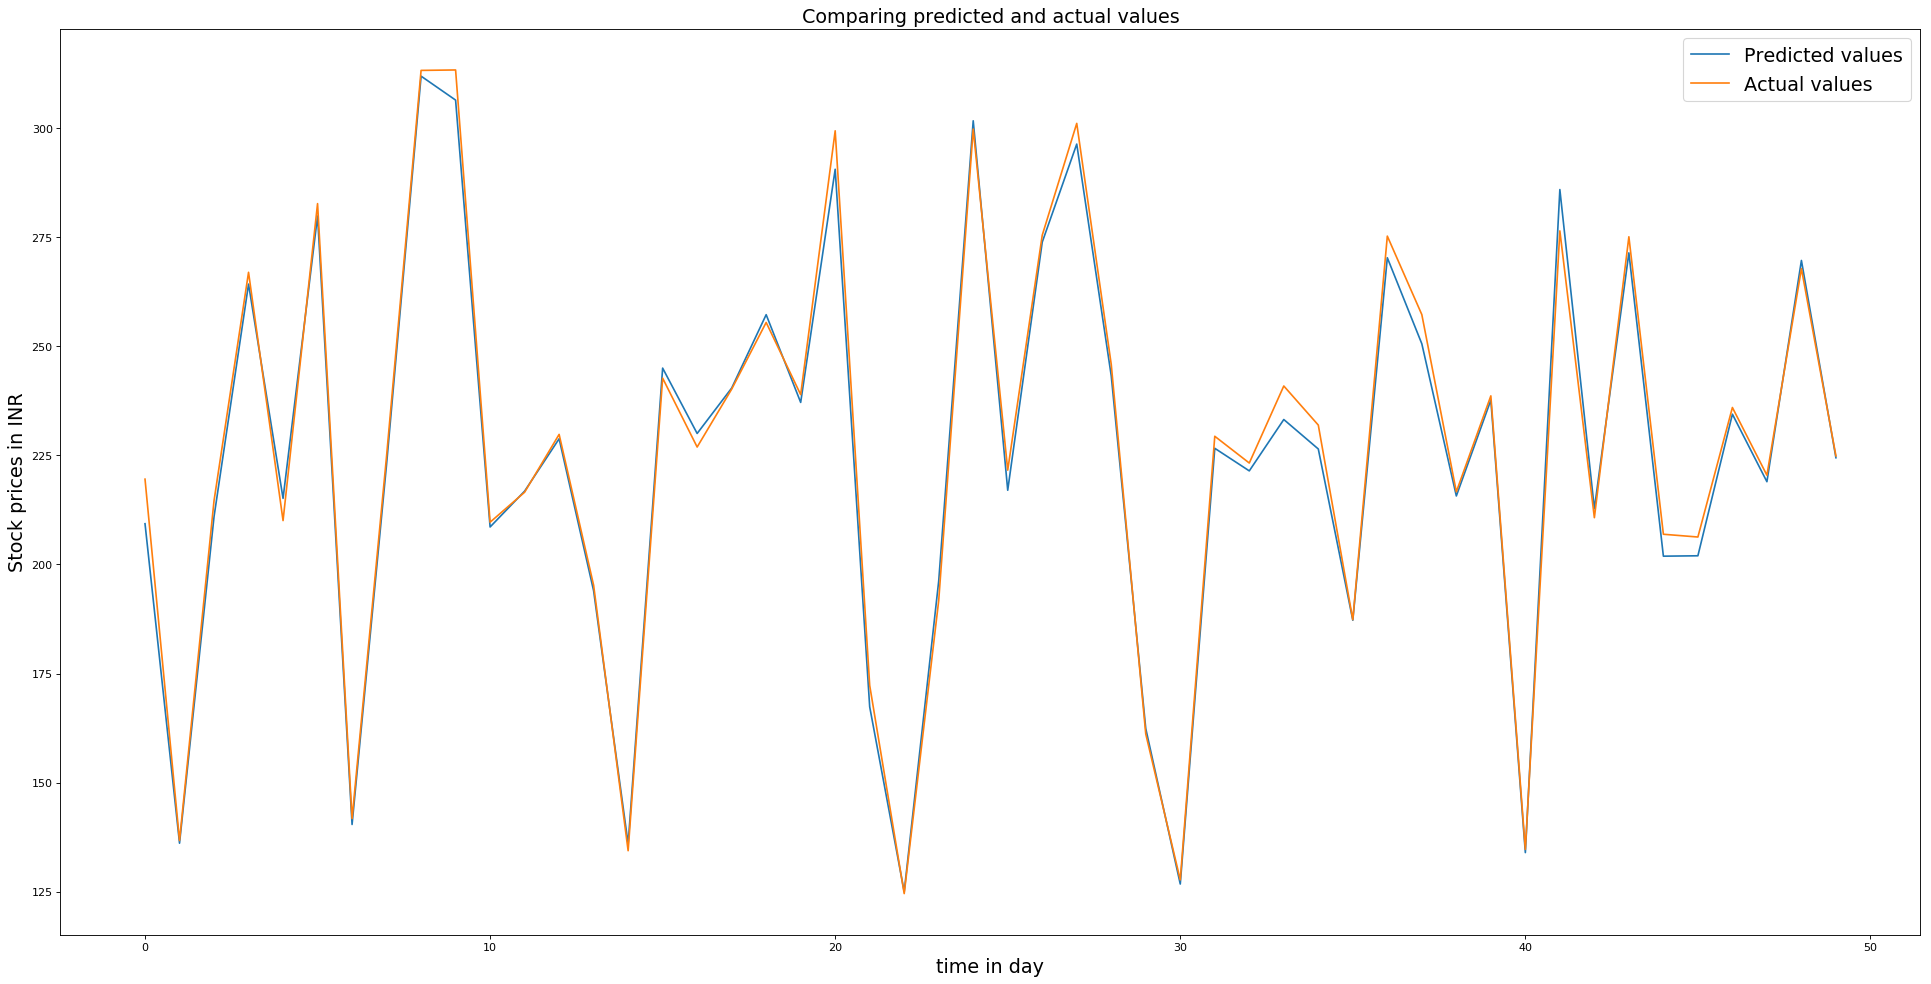

In [162]:
fig=plt.figure(figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(ann_predict[0:50],label = "Predicted values")
plt.plot(y_test[0:50], label = "Actual values")
plt.xlabel('time in day', fontsize = 'xx-large')
plt.ylabel('Stock prices in INR', fontsize = 'xx-large')
plt.title('Comparing predicted and actual values', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()